### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [105]:
data = pd.read_csv('data/coupons.csv')

In [106]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Findout are there null values

In [108]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [109]:
# Fill missing values with 'never'
col_to_fill = ['Bar', 'car','CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[col_to_fill] = data[col_to_fill].fillna('never')

# Verify that there are no more missing values in these columns
print(data[col_to_fill].isnull().sum())

Bar                     0
car                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [110]:
accept_prop= data['Y'].mean()
print(f"Accepted coupons propertion mean: {accept_prop:.2f}")

Accepted coupons propertion mean: 0.57


5. Use a bar plot to visualize the `coupon` column.

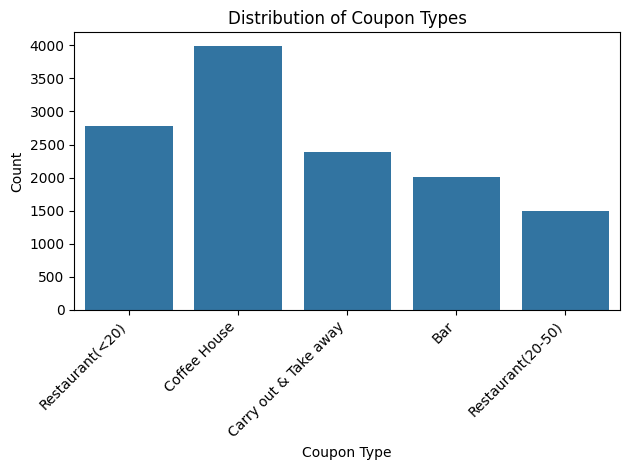

<Figure size 640x480 with 0 Axes>

In [135]:
sns.countplot(data=data, x='coupon')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig('images/coupon_distribution.png')

6. Use a histogram to visualize the temperature column.

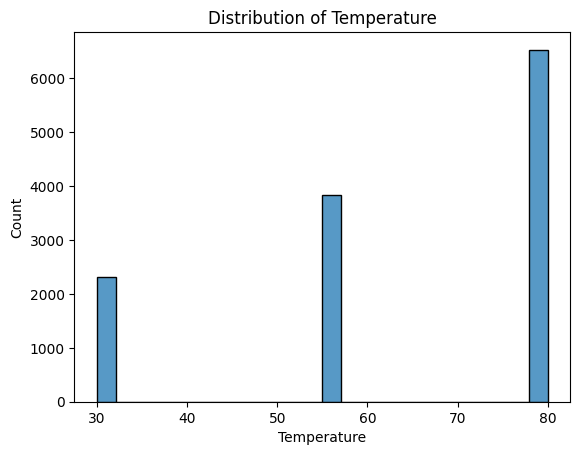

<Figure size 640x480 with 0 Axes>

In [136]:
sns.histplot(data=data, x='temperature')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()
plt.savefig('images/temperature_distribution.png')

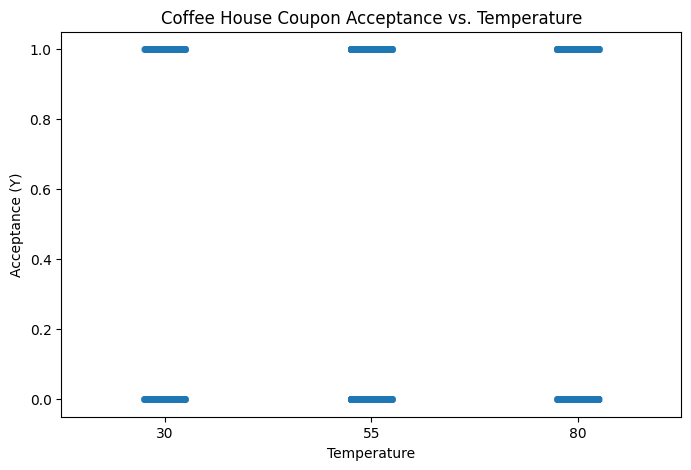

<Figure size 640x480 with 0 Axes>

In [147]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=coffee_house_coupons, x='temperature', y='Y', jitter=0.1, alpha=0.5)
plt.title('Coffee House Coupon Acceptance vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Acceptance (Y)')
plt.show()
plt.savefig('images/coff_vs_temp.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [114]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
display(bar_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [115]:
bar_accept_proprt = bar_coupons['Y'].mean()
print(f"Accepted bar coupons proportion: {bar_accept_proprt:.2f}")

Accepted bar coupons proportion: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [116]:
# Define the categories for bar visits
bar_3_or_fewer = ['never', 'less1', '1~3']
bar_more_than_3 = ['4~8', 'greater than 8']

# Create new columns to categorize bar visit frequency using numpy.select
conditions = [
    bar_coupons['Bar'].isin(bar_3_or_fewer),
    bar_coupons['Bar'].isin(bar_more_than_3)
]
choices = ['3 or fewer', 'more than 3']
bar_coupons['BarFrequency'] = np.select(conditions, choices, default='unknown')

In [117]:
# Calculate the acceptance rate for each group
bar_frequency_acceptance = bar_coupons.groupby('BarFrequency')['Y'].mean().reset_index()

print("Acceptance rate of bar coupons based on bar visit frequency:")
display(bar_frequency_acceptance)

Acceptance rate of bar coupons based on bar visit frequency:


,BarFrequency,Y
0,3 or fewer,0.370737
1,more than 3,0.780000
2,unknown,0.734694


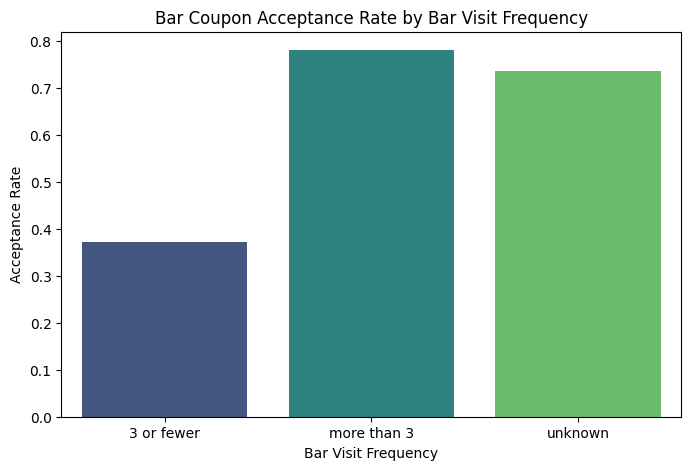

<Figure size 640x480 with 0 Axes>

In [139]:
plt.figure(figsize=(8, 5))
sns.barplot(data=bar_frequency_acceptance, x='BarFrequency', y='Y', hue='BarFrequency', palette='viridis', legend=False)
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.show()
plt.savefig('images/bar_frequency_acceptance.png')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [119]:
# Define the categories for bar visits more than once a month
bar_more_than_once = ['1~3', '4~8', 'greater than 8']

# Convert age to numeric, coercing errors to NaN
age_mapping = {'below 21': 20, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 50}
bar_coupons['age_numeric'] = bar_coupons['age'].map(age_mapping).astype(float)



In [120]:
# Create a new column to categorize drivers based on the conditions
conditions = [
    (bar_coupons['Bar'].isin(bar_more_than_once)) & (bar_coupons['age_numeric'] > 25),
]
choices = ['Bar > 1/month and Age > 25']
bar_coupons['BarFreq_Age_Category'] = np.select(conditions, choices, default='Others')

# Calculate the acceptance rate for each group
bar_freq_age_acceptance = bar_coupons.groupby('BarFreq_Age_Category')['Y'].mean().reset_index()

print("Acceptance rate of bar coupons based on bar visit frequency (>1/month) and age (>25):")
display(bar_freq_age_acceptance)

Acceptance rate of bar coupons based on bar visit frequency (>1/month) and age (>25):


,BarFreq_Age_Category,Y
0,Bar > 1/month and Age > 25,0.694872
1,Others,0.341733


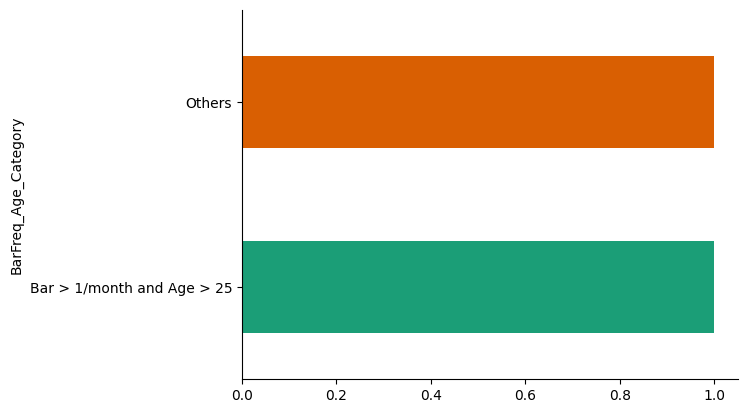

In [140]:
from matplotlib import pyplot as plt
import seaborn as sns
bar_freq_age_acceptance.groupby('BarFreq_Age_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('images/bar_freq_age_acceptance.png')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [122]:
# Define the categories for bar visits more than once a month
bar_more_than_once = ['1~3', '4~8', 'greater than 8']

# Define occupations to exclude
excluded_occupations = ['Farming, Fishing, and Forestry Occupations']

# Create a new column to categorize drivers based on the conditions
conditions = [
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (~bar_coupons['passanger'].isin(['Kid(s)'])) &
    (~bar_coupons['occupation'].isin(excluded_occupations))
]
choices = ['Bar > 1/month, Not Kid Passenger, Not Excluded Occupation']
bar_coupons['BarFreq_Passenger_Occupation_Category'] = np.select(conditions, choices, default='Others')

# Calculate the acceptance rate for each group
bar_pass_acceptance = bar_coupons.groupby('BarFreq_Passenger_Occupation_Category')['Y'].mean().reset_index()

display(bar_pass_acceptance)

,BarFreq_Passenger_Occupation_Category,Y
0,"Bar > 1/month, Not Kid Passenger, Not Excluded...",0.711730
1,Others,0.309775


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [123]:
# Define the conditions for each group
bar_more_than_once = ['1~3', '4~8', 'greater than 8']
cheap_restaurant_more_than_4 = ['4~8', 'greater than 8']
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

In [124]:
# Condition 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_1 = (bar_coupons['Bar'].isin(bar_more_than_once)) & \
              (~bar_coupons['passanger'].isin(['Kid(s)'])) & \
              (bar_coupons['maritalStatus'] != 'Widowed')

In [125]:
# Condition 2: go to bars more than once a month and are under the age of 30
age_under_30 = ['below 21', '21', '26']
condition_2 = (bar_coupons['Bar'].isin(bar_more_than_once)) & \
              (bar_coupons['age'].isin(age_under_30))

In [126]:
# Condition 3: go to cheap restaurants more than 4 times a month and income is less than 50K
condition_3 = (bar_coupons['RestaurantLessThan20'].isin(cheap_restaurant_more_than_4)) & \
              (bar_coupons['income'].isin(income_less_than_50k))

In [127]:
# Combine the conditions with OR
combined_condition = condition_1 | condition_2 | condition_3

# Create a new column to categorize drivers
bar_coupons['Combined_Category'] = np.where(combined_condition, 'Meets at least one condition', 'Others')

# Calculate the acceptance rate for each group
combined_acceptance = bar_coupons.groupby('Combined_Category')['Y'].mean().reset_index()

print("Acceptance rate of bar coupons based on combined conditions:")
display(combined_acceptance)

Acceptance rate of bar coupons based on combined conditions:


,Combined_Category,Y
0,Meets at least one condition,0.596439
1,Others,0.316456


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

as per analysis drivers are more likely to accept bar coupons. In particular, drivers who go to bars more than three times a month accept coupons more often. Acceptance is also higher among drivers over 25 who visit bars at least once a month, don’t have kids as passengers, and don’t work in farming, fishing, or forestry. combinations of factors , like bar visit frequency, age, passenger type, job, cheap restaurant visits, and income, some  are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [128]:
print(data['coupon'].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [129]:
coffee_house_coupons = data[data['coupon'] == 'Coffee House'].copy()
display(coffee_house_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


In [130]:
coffee_house_accept_prop = coffee_house_coupons['Y'].mean()
print(f"Accepted coffee house coupons proportion: {coffee_house_accept_prop:.2f}")

Accepted coffee house coupons proportion: 0.50


In [146]:
#Explore characteristics of acceptors
# Select relevant features
features_to_analyze = ['age', 'passanger', 'occupation', 'time', 'weather', 'CoffeeHouse']


Acceptance rate of Coffee House coupons by temperature:


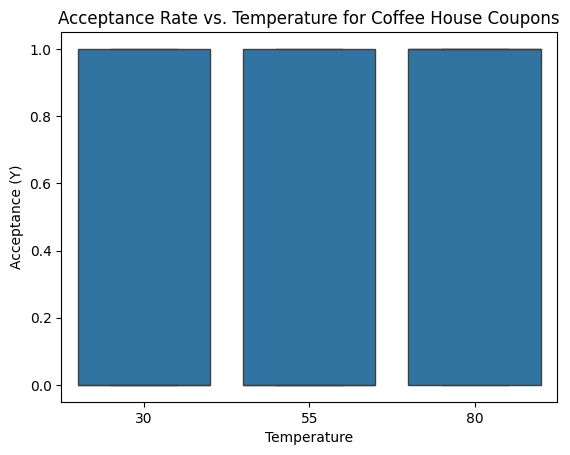

<Figure size 640x480 with 0 Axes>

In [145]:
# Analyze temperature
print("Acceptance rate of Coffee House coupons by temperature:")
sns.boxplot(data=coffee_house_coupons, x='temperature', y='Y')
plt.title('Acceptance Rate vs. Temperature for Coffee House Coupons')
plt.xlabel('Temperature')
plt.ylabel('Acceptance (Y)')
plt.show()
plt.savefig('images/coffh_accpt_vs_temp-bar.png')

In [133]:
# Analyze categorical features
for feature in features_to_analyze:
    if coffee_house_coupons[feature].dtype == 'object': # Check if the feature is categorical
        acceptance_rate = coffee_house_coupons.groupby(feature)['Y'].mean().reset_index()
        print(f"Acceptance rate of Coffee House coupons by {feature}:")
        display(acceptance_rate)

Acceptance rate of Coffee House coupons by age:


,age,Y
0,21,0.524349
1,26,0.514828
2,31,0.476726
3,36,0.467662
4,41,0.501538
5,46,0.513636
6,50plus,0.420183
7,below21,0.696774


Acceptance rate of Coffee House coupons by passanger:


,passanger,Y
0,Alone,0.437943
1,Friend(s),0.596906
2,Kid(s),0.483092
3,Partner,0.570492


Acceptance rate of Coffee House coupons by occupation:


,occupation,Y
0,Architecture & Engineering,0.555556
1,Arts Design Entertainment Sports & Media,0.507177
2,Building & Grounds Cleaning & Maintenance,0.727273
3,Business & Financial,0.479452
4,Community & Social Services,0.351351
5,Computer & Mathematical,0.503341
6,Construction & Extraction,0.478261
7,Education&Training&Library,0.435811
8,Farming Fishing & Forestry,0.545455
9,Food Preparation & Serving Related,0.445783


Acceptance rate of Coffee House coupons by time:


,time,Y
0,10AM,0.640712
1,10PM,0.424242
2,2PM,0.547859
3,6PM,0.412626
4,7AM,0.445783


Acceptance rate of Coffee House coupons by weather:


,weather,Y
0,Rainy,0.522124
1,Snowy,0.432343
2,Sunny,0.503605


Acceptance rate of Coffee House coupons by CoffeeHouse:


,CoffeeHouse,Y
0,1~3,0.647793
1,4~8,0.685874
2,gt8,0.657895
3,less1,0.481860
4,never,0.208208


/tmp/ipython-input-144-662426962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(acceptance_rate, x='Y', y='CoffeeHouse', inner='stick', palette='Dark2')


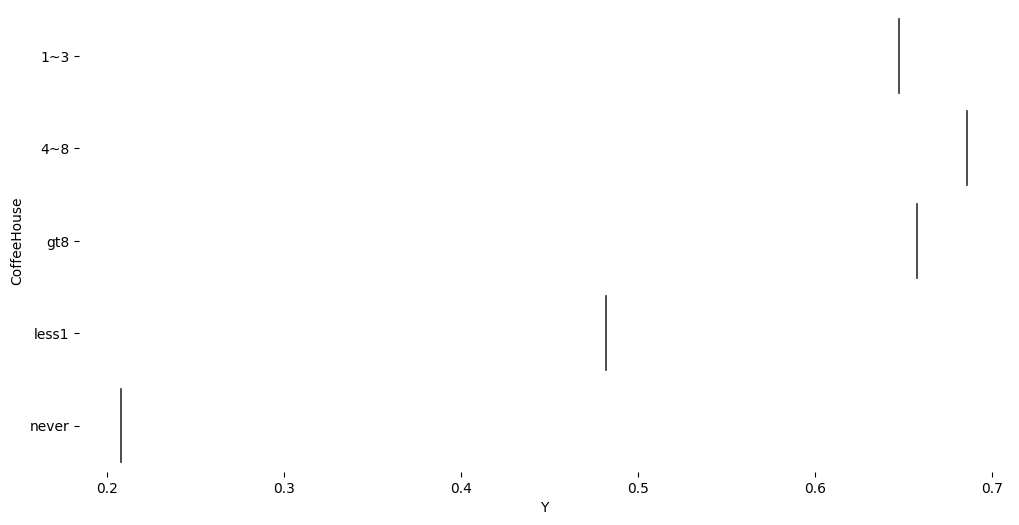

In [144]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(acceptance_rate['CoffeeHouse'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(acceptance_rate, x='Y', y='CoffeeHouse', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.savefig('images/ch_accpt_vs_temp.png')

#Analysis for Coffee House
analysis of coffee house coupons depends on several key trends among drivers who accepted them:
Overall, about {{coffee_house_accept_prop:.2f}} of drivers accepted the coupon, which is lower than the average for all coupon types.Younger drivers, especially those under 21, are more likely to accept coffee house coupons.
Drivers with friends or partners as passengers accept more often than those driving alone or with kids.Certain occupations—like cleaning & maintenance, healthcare, and students—show higher acceptance rates.Coupons offered at 10 AM are accepted more often than at other times.Drivers who frequently visit coffee houses (at least once a month) are much more likely to accept these coupons.